# CSINTSY MC01 - SokoBot Analyzer

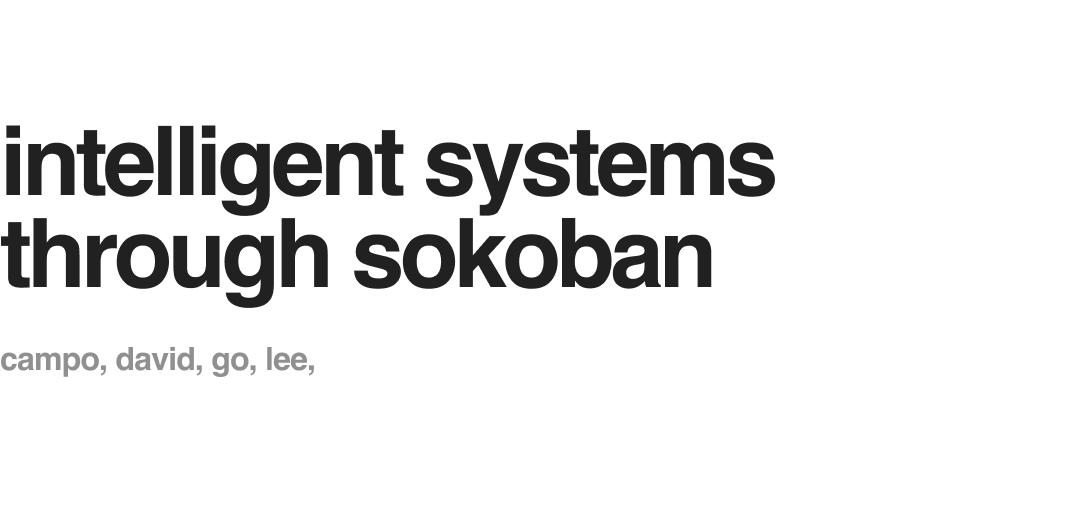

This Jupyter notebook file serves as a basis to analyze the efficiency of our group's sokobot.


## Preprocessing Modules
These are modules needed before running the analyzer. Please make sure to install the packages before running the analyzer.

To install packages, make sure you have the latest installation of pip and do `pip install x` where `x` is the name of the package required.

| Modules                                                                             |
|:-----------------------------------------------------------------------------------:|
|<div><img src="../../README/modules_used/pandas.png" height="100"/></div>            |
|<div><img src="../../README/modules_used/matplotlib.svg" height="100"/></div>        |
|<div><img src="../../README/modules_used/numpy.png" height="100"/></div>             |
|<div><img src="../../README/modules_used/scipy.png" height="100"/></div>             |
|<div><img src="../../README/modules_used/seaborn.svg" height="100"/></div>           |
|<div><img src="../../README/modules_used/sklearn.png" height="100"/></div>           |

In [40]:
# Be sure to actually install the packages on your computer
# e.g. pip install pandas
import math
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from scipy.optimize import curve_fit
from IPython.display import display, Math

# Some settings to help.
warnings.filterwarnings('ignore')
pd.set_option('display.width', 1000)
 

These are constants needed for the analysis to work. Some constants are there to help visualize the given data collected. 

You may change the settings of graphs look through here.

In [41]:

# The CSV file to import
CSV_FILE = "result_tests.csv"

# ANSI Escape code
RESET_COLORS = "\033[0m" 

ROUNDING_ACCURACY = 2;

# Some colors to pick out 
INFO_COLORS = {
    "test_name"                     : "#ff63b7", 
    "test_file"                     : "#ff8c9b", 
    "time_taken"                    : "#efaa9e",
    "no_of_move"                    : "#ff975b",
    "no_of_crates"                  : "#ff8800",
    "has_bot_won"                   : "#fbab0e",
    "solution"                      : "#d3bd7f",
    "width_of_map"                  : "#cec213",
    "height_of_map"                 : "#acd100",
    "number_of_blocks"              : "#97cda2",
    "child_nodes_made"              : "#0edfa3",
    "nodes_expanded"                : "#00edc4",
    "branching_factor"              : "#00dddf",
    "map_density"                   : "#7acddb",
    "has_bot_win_numeric"           : "#00d2ff",
    "map_size"                      : "#00caff",
    "log_nodes_expanded"            : "#6ec0ff",
    "log_child_nodes_made"          : "#a9bcf4",
    "log_no_of_move"                : "#b4acff",
    "log_map_size"                  : "#d98dff",
    "avg_node_creation_per_sec"     : "#e69aff",
    "avg_node_processed_per_sec"    : "#ddabd7"
}

RANDOM_SEED = 271828

INFO_NAMES = {
    "test_name"                     : "Test name", 
    "test_file"                     : "Test file", 
    "time_taken"                    : "Time taken to solve",
    "no_of_move"                    : "Number of moves",
    "no_of_crates"                  : "Number of crates",
    "has_bot_won"                   : "Boolean of bot wins",
    "solution"                      : "Solution string",
    "width_of_map"                  : "Map Width",
    "height_of_map"                 : "Map Height",
    "number_of_blocks"              : "Number of blocks",
    "child_nodes_made"              : "New nodes created",
    "nodes_expanded"                : "Nodes processed",
    "branching_factor"              : "Branching factor",
    "map_density"                   : "Map density",
    "has_bot_win_numeric"           : "Number of bot wins",
    "map_size"                      : "Map Size",
    "log_nodes_expanded"            : "Logarithm of Node Expansion",
    "log_child_nodes_made"          : "Logarithm of Child Nodes Created",
    "log_no_of_move"                : "Logarithm of Solution Length",
    "log_map_size"                  : "Logarithm of Map Size",
    "avg_node_creation_per_sec"     : "Average node creation per sec",
    "avg_node_processed_per_sec"    : "Average node processing per sec"
}

INFO_NICKNAMES = {
    "test_name"                     : "Test name", 
    "test_file"                     : "Test file", 
    "time_taken"                    : "Time taken",
    "no_of_move"                    : "Moves",
    "no_of_crates"                  : "Crates",
    "has_bot_won"                   : "Bot Wins",
    "solution"                      : "Solution",
    "width_of_map"                  : "Map width",
    "height_of_map"                 : "Map height",
    "number_of_blocks"              : "Blocks",
    "child_nodes_made"              : "Nodes Made",
    "nodes_expanded"                : "Nodes Proccessed",
    "branching_factor"              : "B factor",
    "map_density"                   : "Map density",
    "map_size"                      : "Map Size",
    "has_bot_win_numeric"           : "Bot Wins",
    "log_nodes_expanded"            : "Log Nodes Made",
    "log_child_nodes_made"          : "Log Child Nodes",
    "log_no_of_move"                : "Log Solution Len",
    "log_map_size"                  : "Log Map Size",
    "avg_node_creation_per_sec"     : "Avg n created / sec",
    "avg_node_processed_per_sec"    : "Ave n processed / sec"
}

# Additional colors to highlight colors
COLORS = {
    "RED"       : "#ff63b7",
    "GREEN"     : "#00e75b"
}

STAT_NAME = {
    "mean"      : "Average",
    "median"    : "Median",
    "max"       : "Maximum",
    "min"       : "Minimum",
    "sum"       : "Summation"
}

### Coloring and Visualization
These functions help with analyzing data in a much visually significant way.

Not only that, it makes the graphs aesthetically pleasing to analyze.

In [42]:
# Colors text output of some functions.
def hex_to_rgb(hex_code: str) -> tuple[int, int, int]:
    """Turns hexcode to rgb

    Args:
        hex_code (str): hexcode that starts with #

    Returns:
        tuple(int, int, int): a tuple containing rgb information
    """
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i + 2], 16) for i in (0, 2, 4))

def rgb_to_ansi_rgb(r, g, b):
    """Turns rgb values to ANSI escape codes

    Args:
        r (int): red
        g (int): green
        b (int): blue

    Returns:
        str: Equivalent Ansi Escape code.
    """
    return f"\033[38;2;{r};{g};{b}m"

def colored_text(hex_code) -> str:
    """colors text output 
    Args:
        hex_code (str): hexcode that starts with #

    Returns:
        str: Equivalent Ansi Escape code.
    """
    r, g, b = hex_to_rgb(hex_code)
    ansi_color = rgb_to_ansi_rgb(r, g, b)
    return ansi_color;

def rgb_to_hex(rgb: tuple[str, str, str]) -> str:
    """Generate a hexcode string from a rgb tuple

    Args:
        rgb (tuple[str, str, str]): 3-tuple representation of rgb values

    Returns:
        str: hexcode of the rgb values
    """
    return '#{:02x}{:02x}{:02x}'.format(rgb[0], rgb[1], rgb[2])

def mix_colors(hex_code1: str, hex_code2: str) -> str:
    """Mixes two colors together 

    Args:
        hex_code1 (str): string of color 1's hex code
        hex_code2 (str): string of color 2's hex code

    Returns:
        str: the mixed color's rgb code
    """
    # Unpack the RGB values
    r1, g1, b1 = hex_to_rgb(hex_code1)
    r2, g2, b2 = hex_to_rgb(hex_code2)
    
    # Average the RGB values
    mixed_color = (
        (r1 + r2) // 2, 
        (g1 + g2) // 2, 
        (b1 + b2) // 2
    )
    
    return rgb_to_hex(mixed_color)

def print_essay(essay: list[str]) -> None:
    """Concatenates a list of strings, then prints them in a single println statement.

    Args:
        essay (list[str]): List of sentences you want to output
    """
    output: str = str("");
    for sentence in essay:
        output += ('\n' + sentence);
    print(output)

def calculate_percent(partial: int, total: int):
    if total > 0: 
        return  partial/total * 100
    return 0

def str_percentage_bar(partial: int, total: int, length = 30) -> str:
  percent = calculate_percent(partial, total)
  bar_length = int(length * percent // 100)
  full_char, empty_char  = '█', '-'
  
  str_bar: str =  (f'{colored_text(COLORS['GREEN'])}' + 
                   f'{full_char}' * bar_length + 
                   f'{colored_text(COLORS['RED'])}' + 
                   f'{empty_char}' * (length - bar_length) +
                   f'{(RESET_COLORS)}')
  
  return f'[{str_bar}]({percent: .2f} % )'



These sections contains helpful functions that preprocess the dataframe. A few can convert columns into analyzable data.


In [43]:
# Functions to preprocess the data.
def create_logs_of_colmn(df: pd.DataFrame, col_names: list[str]):
    """Create the logarithm of a list of column names

    Args:
        df (pd.DataFrame): dataframe to modify
        col_names (list[str]): list of strings to modify
    """
    for col_name in col_names:
        df["log_{}".format(col_name)] = df[col_name].agg(math.log)


def remove_seconds(input: str):
    """Used as an aggregate function to strip the seconds unit

    Args:
        input (str): numeric containing s at the end

    Returns:
        str: String with removed string unit
    """
    return input.rstrip("s"); 

def preprocess_df(df: pd.DataFrame) -> None:
    """Preprocesses dataframe for compatability. Turns the type of time_taken to float.

    Args:
        df (pd.DataFrame): dataframe to modify
    """
    # Time str into float
    df["time_taken"] = df["time_taken"].transform(remove_seconds)
    df["time_taken"] = df["time_taken"].astype(float);
    
    # Cleaning up
    df.loc[df['solution'].isin(["No solution found.", "Timed out."]), 'no_of_move'] = 0
    
    # Creation of other fields important
    df["branching_factor"] = df["child_nodes_made"] / df["nodes_expanded"]
    
    df["map_size"] = df ["width_of_map"] * df["height_of_map"]
    df["map_density"] = (df["map_size"]) / df["number_of_blocks"] 
    
    # Needed for correlation map as numerics are needed, not booleans
    df["has_bot_win_numeric"] = df["has_bot_won"].astype(int);
    
    # Logarithm 
    df["log_no_of_move"] = df["no_of_move"].agg(np.log10)
    df["log_child_nodes_made"] = df["child_nodes_made"].agg(np.log10)
    df["log_nodes_expanded"] = df["nodes_expanded"].agg(np.log10)
    df["log_map_size"] = df["map_size"].agg(np.log10)
    
    # Average Processing Speed
    df["avg_node_creation_per_sec"] = df["child_nodes_made"] / df["time_taken"]
    df["avg_node_processed_per_sec"] = df["nodes_expanded"] / df["time_taken"]


def sum_statistics(df: pd.DataFrame) -> None:
    """Summarizes some statistics per item and prints them.

    Args:
        df (pd.DataFrame): dataframe to modify
    """
    str_stats = ""
    
    for col, color in INFO_COLORS.items():
        sum_statistics.concat("\nStatistics of " + colored_text(color) + col + RESET_COLORS + ":\n")
        sum_statistics.concat("mean, median (min, max)\n{}, {} ({}, {})\n".format(
            round(df[col].agg("mean")   , ROUNDING_ACCURACY),
            round(df[col].agg("median") , ROUNDING_ACCURACY),
            round(df[col].agg("max")    , ROUNDING_ACCURACY),
            round(df[col].agg("min")    , ROUNDING_ACCURACY),
        ))
    print(str_stats) 
    
def bin_creation(df, info_type, nodes_group: int = 10, starting_index = 0):
  return [i * df[info_type].agg("max") / (nodes_group - 1) for i in range(starting_index, nodes_group)]

Import the actual data from the CSV file.

In [44]:
# Read the given CSV file within the same directory of the folder
df = pd.read_csv(CSV_FILE)

preprocess_df(df)
# Separate two different datasets
df_sucessful    = df[df["has_bot_won"] == True];
df_failed       = df[df["has_bot_won"] == False];

Define functions that does linear regression to infer the relationship of two correlated values.

In [45]:
# Get Linear Regression Scores
def get_linear_regression_scores(df: pd.DataFrame, col_tuple: tuple[str, str]):
    """Gets linear regression scores

    Args:
        df (pd.DataFrame): _description_
        col_tuple (tuple[str, str]): _description_

    Returns:
        _type_: _description_
    """
    regression_df = df
    
    x_train, x_test, y_train, y_test = train_test_split(regression_df[[col_tuple[0]]], 
                                                        regression_df[col_tuple[1]], 
                                                        test_size = 0.1, 
                                                        random_state=RANDOM_SEED);
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test);
    r2, rmse = r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred);
    
    return (r2, rmse)
    
def plot_regression_line(df: pd.DataFrame, col_tuple: tuple[str, str], ax: plt.axes):
    """Plots a regression line given a tuple.

    Args:
        df (pd.DataFrame): df to plot from
        col_tuple (tuple[str, str]): Two series to plot a relationship
        ax (plt.axes): axis to plot on
    """
    regression_df = df
    x_train, _, y_train, _ = train_test_split(regression_df[[col_tuple[0]]], 
                                                        regression_df[col_tuple[1]], 
                                                        test_size = 0.1, 
                                                        random_state=RANDOM_SEED);
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    coeffients: np.array = model.coef_
    print(coeffients)
    label = f'Curve: {coeffients[0]:.2f} * x'
    if coeffients.shape == (2):
        label = f'Curve: {coeffients[0]: .2f} * x + {coeffients[1]: .2f}'
        
    ax.plot(df[col_tuple[0]], 
            model.predict(df[[col_tuple[0]]]), 
            color=f"{INFO_COLORS[col_tuple[1]]}",
            label = label
            )
    
    plt.legend()

def plot_exp_line(df: pd.DataFrame, col_tuple: tuple[str, str], ax: plt.axes):
    plotting_df = df[[col_tuple[0], col_tuple[1]]];
    
    lambda_exp = lambda t, a, b: a * np.exp(b*t);
    
    fitted_curve, _ = curve_fit(lambda_exp, plotting_df[col_tuple[0]], plotting_df[col_tuple[1]]);
    a, b = fitted_curve;
    
    
    lambda_k = lambda t: a * np.exp(b * t) 
    a = np.ceil(a * 100) / 100
    b = np.ceil(b * 100) / 100
    label = f'Curve: {a:.2f} * exp({b:.2f} * x)'
    x_domain = np.arange(plotting_df[col_tuple[0]].min(), plotting_df[col_tuple[0]].max());
    y_domain = lambda_k(x_domain);
    
    color = INFO_COLORS[col_tuple[1]]
    

    ax.plot(x_domain, 
            y_domain, 
            color = color,
            label = label
            )
    plt.legend()
    
def plot_log_line(df: pd.DataFrame, col_tuple: tuple[str, str], ax: plt.axes):
    plotting_df = df[[col_tuple[0], col_tuple[1]]];
    
    lambda_exp = lambda t, a, b: a + b * np.log(t);
    
    fitted_curve, _ = curve_fit(lambda_exp, plotting_df[col_tuple[0]], plotting_df[col_tuple[1]]);
    a, b = fitted_curve;
    
    
    lambda_k = lambda t: a + b * np.log(t) 
    a = np.ceil(a * 100) / 100
    b = np.ceil(b * 100) / 100
    label = f'Curve: {a:.2f} * exp({b:.2f} * x)'
    x_domain = np.arange(plotting_df[col_tuple[0]].min(), plotting_df[col_tuple[0]].max());
    y_domain = lambda_k(x_domain);
    
    color = INFO_COLORS[col_tuple[1]]
    

    ax.plot(x_domain, 
            y_domain, 
            color = color,
            label = label
            )
    plt.legend()
    

def get_relationship_type(df: pd.DataFrame, col_tuple: tuple[str, str], has_to_print_essay = True):
    """Prints the likelihood for a relationship to be logarithmic, linear, or exponential by transforming

    Reference:
        SeriousTyro. (2011, August 24). Determine if a set of data is from a linear or logarithmic function? Stack Overflow. https://stackoverflow.com/questions/7181014/determine-if-a-set-of-data-is-from-a-linear-or-logarithmic-function
    
    Args:
        df (pd.DataFrame): _description_
        col_tuple (tuple[str, str]): _description_
    """
    regression_df = df
    log_info_type = f'log_{col_tuple[1]}'
    exp_info_type = f'exp_{col_tuple[1]}'
    regression_df[log_info_type] = regression_df[col_tuple[1]].agg(np.log)
    regression_df[exp_info_type] = regression_df[col_tuple[1]].agg(np.exp)
    
    k_exp = get_linear_regression_scores(regression_df, (col_tuple[0], log_info_type))
    k_linear = get_linear_regression_scores(regression_df, col_tuple)
    try:
        k_log = get_linear_regression_scores(regression_df, (col_tuple[0], exp_info_type))
    except:
        k_log = (0, 0)
    k_o_notation = [k_log, k_linear, k_exp]
    if has_to_print_essay:
        essay_k_score = [
            f"O notation Likelihood in the relationship for {INFO_NAMES[col_tuple[0]]} and {INFO_NAMES[col_tuple[1]]}",
            f"Exponential   (r2, rmse): {k_exp[0]}, {k_exp[1]}",
            f"Linear        (r2, rmse): {k_linear[0]}, {k_linear[1]}",
            f"Logarithmic   (r2, rmse): {k_log[0]}, {k_log[1]}"
        ]
        print_essay(essay_k_score);
    
    
    best_fit = max(range(len(k_o_notation)), key=lambda i: k_o_notation[i][0]);
    return (best_fit, k_o_notation[best_fit][1])

Generates scatter and bar plots.

In [46]:
# Generates scatter plots
def plot_scat_norm(df: pd.DataFrame, info_type: str, custom_color: str = "") -> plt.Axes:
    """Generates a pyplot scatter plot with the index as the x_axis and a column as the y_axis

    Args:
        df (pd.DataFrame): dataframe to plot from
        info_type (str): data to analyze
        custom_color (str, optional): custom color that is in hexcode. Defaults to "".

    Returns:
        plt.Axes: The scatter plot produced.
    """
    picked_color = (custom_color, INFO_COLORS[info_type])[not custom_color]
    ax = plt.scatter(df.index, 
                df[info_type], 
                s = 10, 
                alpha=0.5,
                color = picked_color);
    plt.xlabel("Maps");
    plt.ylabel(f"{INFO_NAMES[info_type]}");
    plt.title(f"Statistic for {INFO_NAMES[info_type]} throughout All Maps");
    plt.grid(linestyle=':', alpha=0.5);
    plt.draw()
    return ax;

def plot_scat_tuple(df: pd.DataFrame, col_tuple: tuple[str, str]) -> plt.Axes:
    """Generates a pyplot graph with the col_tuple[0] as the x_axis and col_tuple[1] as the y_axis

    Args:
        df (pd.DataFrame): dataframe to plot from
        col_tuple (tuple[str, str]): tuple of strings that represent (x, y) values.
        
    Returns:
        plt.Axes: The scatter plot produced.
    """
    df.sort_values(col_tuple[0]);
    _, ax = plt.subplots();
    
    ax.scatter( df[col_tuple[0]], 
                df[col_tuple[1]], 
                s = 10, 
                color = mix_colors(INFO_COLORS[col_tuple[0]], INFO_COLORS[col_tuple[1]]),
                alpha=0.5
                )
    relationship_type, r2_value = get_relationship_type(df, col_tuple, has_to_print_essay=False)

    if r2_value > 0:
        match relationship_type:
            case 2: # exponential
                plot_exp_line(df, col_tuple, ax)
            case 1: # linear
                plot_regression_line(df, col_tuple, ax)
            case 0:
                plot_log_line(df, col_tuple, ax)
    else:
        plot_regression_line(df, col_tuple, ax)
                
    plt.xlabel(f"{INFO_NAMES[col_tuple[0]]}") ;
    plt.ylabel(f"{INFO_NAMES[col_tuple[1]]}");
    plt.title(f"Statistic for {INFO_NAMES[col_tuple[0]]} against {INFO_NAMES[col_tuple[1]]}");
    plt.grid(linestyle=':', alpha=0.5);
    plt.draw();
    return ax

def plot_scat_3d_cmap(df: pd.DataFrame, series_triple: tuple[str, str, str], cmap_series = "", is_create_video = False, is_gif = False):
    """Generate 3d scatter plot based on three Series, with the possible inclusion of a fourth one by domain coloring

    Args:
        df (pd.DataFrame): dataframe to plot from
        series_triple (tuple[str, str, str]):  tuple of strings that represent the names of series for (x, y, z) values.
        cmap_series (str, optional): string of the name of the series to do domain coloring. Defaults to "".
        
    Returns:
        plt.Axes: The scatter plot produced.
    """
    x = df[series_triple[0]]
    y = df[series_triple[1]]
    z = df[series_triple[2]]
    
    if cmap_series:
        w = df[cmap_series]
        # Creating color map
        my_cmap = plt.get_cmap('hsv')

    # Creating figure
    fig = plt.figure(figsize = (16, 9))
    ax  = plt.axes(projection ="3d")
    
    # Add x, y gridlines 
    ax.grid(
        b = True, 
        color ='grey', 
        linestyle ='-.', 
        linewidth = 0.3, 
        alpha = 0.2
    ) 


    plot_title = f"Statistics of {INFO_NICKNAMES[series_triple[0]]}, {INFO_NICKNAMES[series_triple[1]]}, {INFO_NICKNAMES[series_triple[2]]}"
    
    if cmap_series:
        scatter_plot = ax.scatter3D(x, y, z,
                    alpha = 0.5,
                    c = w, 
                    cmap = my_cmap, 
                    marker ='^')

    else:
        out_color = mix_colors(mix_colors(INFO_COLORS[series_triple[0]], INFO_COLORS[series_triple[1]]), INFO_COLORS[series_triple[2]])
        scatter_plot = ax.scatter3D(x, y, z,
                    alpha = 0.5,
                    c = out_color,
                    marker ='^')
    
    if cmap_series:
        plot_title += f" and {INFO_NICKNAMES[cmap_series]}";
        # Label color bar
        cbar = fig.colorbar(scatter_plot, ax=ax, shrink=0.5, aspect=5)
        cbar.set_label(cmap_series, rotation=270, labelpad=20, fontweight='bold')     
    
    plt.title(plot_title)
    ax.set_xlabel(series_triple[0], fontweight ='bold') 
    ax.set_ylabel(series_triple[1], fontweight ='bold') 
    ax.set_zlabel(series_triple[2], fontweight ='bold')
     
    plt.grid(linestyle=':', alpha=0.5)
    plt.show()
    
    if is_create_video:
        def init():
            ax.view_init(elev=10., azim=0)
            return fig,

        def animate_3d_scatter(i):
            ax.view_init(elev=10., azim=i)
            return fig,
        animated = animation.FuncAnimation(fig, animate_3d_scatter, init_func= init, frames=360, interval=20, blit=True)
        if is_gif:
            pillow_writer = animation.PillowWriter(fps=60, metadata=dict(artist='iwillreku3206, ImaginaryLogs, neue.dev'))
            animated.save(f'./media/3d_scatter_plot_{plot_title}.gif',writer=pillow_writer)
        else:
            animated.save(f'./media/3d_scatter_plot_{plot_title}.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

def plot_bar_success_comparison(info_type: str) -> None:
    """Generates a scatter graph that groups winning and losing maps separately with `info_type` as the Series to compare on

    Args:
        info_type (str): series to compare on.
    """
    plot_scat_norm(df_sucessful, info_type, COLORS["GREEN"])
    plot_scat_norm(df_failed, info_type, COLORS["RED"])
    plt.legend(['Success', "Failed"], loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(linestyle=':', alpha=0.5)
    plt.show()

def adjust_scatter_annotations(annotations: list[mpl.text]) -> None:
    """Adjust the most recent plot created with the annotations included in the bounding box.

    Args:
        annotations (list[mpl.text]): list of annotations to include in the bounding box.
    """
    # Annotation adjustment
    for annotation in annotations:
        # Get bounding box
        bbox = annotation.get_window_extent()
        
        # Transform bounding box to coordinates on the graph
        ax = plt.gca()
        bbox_data = bbox.transformed(ax.transData.inverted())
        
        # Expand margins based on coordinates
        ax.update_datalim(bbox_data.corners())
        
        # Recalculate axis
        ax.autoscale_view()
        
def generate_annon_normal(pivot_table: pd.DataFrame, value_name: str, ax: plt.axes) -> list[mpl.text]:
    """Generates annotations

    Args:
        pivot_table (pd.DataFrame): pandas dataframe to based it on
        value_name (str): series to get the value from
        ax (plt.axes): the axis to annotate     

    Returns:
        list[mpl.text]: list of annotations
    """
    annotations = []
    for (index, series_partial) in pivot_table.iterrows():
        # Get the actual data
        partial = series_partial[value_name]
    
        # Create an annotation placed on the right of the bar graph
        annotation = ax.annotate(f'{round(partial, ROUNDING_ACCURACY)}', 
                    xy=(partial, index - 1),  # Use partial if no second graph, else get the actual percentage from the bigger graph
                    xytext=(5, 0),
                    va='center',
                    ha='left',
                    textcoords='offset points')
        annotations.append(annotation)
    return annotations

def plot_bar_groupby(df: pd.DataFrame, group_name: str, info_type: str, aggfunc: str = "mean") -> None:
    """Generates a simple bar plot on `info_type` that is grouped. 

    Args:
        df (pd.DataFrame): dataframe to plot from
        group_name (str): value to group the dataframe
        info_type (str): series to plot
        aggfunc (str, optional): Aggregate function. Defaults to "mean".
    """
    df_col1_per_groupcol = df.pivot_table(index=group_name, values=info_type, aggfunc=aggfunc)

    # Plotting both the total maps and wins on the same graph
    ax = df_col1_per_groupcol.plot(kind='barh', legend=False, alpha=0.5, color=f'{INFO_COLORS[info_type]}', width=1, edgecolor='white', linewidth=1)
    
    annotations = generate_annon_normal(df_col1_per_groupcol, info_type, ax);

    plt.title(f'{STAT_NAME[aggfunc]} {INFO_NAMES[info_type]} per {INFO_NAMES[group_name]}')
    plt.xlabel(f'{INFO_NAMES[info_type]}')
    plt.ylabel(f'{INFO_NAMES[group_name]}')
    plt.legend([f'{INFO_NAMES[info_type]}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(linestyle=':', alpha=0.5)
    # Show the updated plot
    plt.draw()
    adjust_scatter_annotations(annotations)

def generate_annon_bins(bin_df: pd.DataFrame, num_groups: int, indices: int, ax: plt.axes, colors: list[str] = []) -> None:
    """Creates annotations for graphs that has bins

    Args:
        bin_df (pd.DataFrame): dataframe to annotate
        num_groups (int): number of groups
        indices (int): array of evenly spaces indexes representing each bin
        ax (plt.axes): the axis to annotate
        colors (list[str], optional): custom colors. Defaults to [].
    """
    bars = []

    bar_width = 0.6 / num_groups  # Adjusting the total width for the number of groups
    colors = plt.cm.get_cmap('Set1', num_groups) if len(colors) == 0 else colors  # Dynamically get colors from the colormap

    # e.g. bin_df.columns have ['True', 'False'] groups
    # iterate each group, 'True', and iterate each bar
    for i, group in enumerate(bin_df.columns):
        bar_positions = indices - (bar_width * num_groups) / 2 + i * bar_width
        
        if (len(colors) == 0):
            bar = ax.bar(bar_positions, bin_df[group], bar_width, label=group, color=colors(i), edgecolor='white', linewidth=1)
        else:
            bar = ax.bar(bar_positions, bin_df[group], bar_width, label=group, color=colors[i], edgecolor='white', linewidth=1)
            
        bars.append(bar)

        # Add annotations on top of each bar
        for rect in bar:
            yval = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, yval, int(yval), ha='center', va='bottom')

def generate_annon_percentage(pivot_table_partial: pd.DataFrame, pivot_table_total: pd.DataFrame, info_type: str, ax: plt.axes) -> list[mpl.text]:
    """Generates annotations for graphs with percentage
    Args:
        pivot_table_partial (pd.DataFrame): partial dataframe
        pivot_table_total (pd.DataFrame): overall dataframe 
        info_type (str): series of information to gather from
        ax (plt.axes): the axis to annotate

    Returns:
        list[mpl.text]: list of annotations generated
    """
    annotations = []
    
    for (index, series_partial), (_, series_total) in zip(pivot_table_partial.iterrows(), pivot_table_total.iterrows()):
        # Get the actual data
        partial = series_partial[info_type]
        total = series_total[info_type]
        
        percent = calculate_percent(partial, total)
        
        # Create an annotation placed on the right of the bar graph
        annotation = ax.annotate(f'{int(partial)} ({percent:.2f}%)', 
                    xy=(percent*total / 100, index - 1),  # Use partial if no second graph, else get the actual percentage from the bigger graph
                    xytext=(5, 0),
                    va='center',
                    ha='left',
                    textcoords='offset points')
        annotations.append(annotation)
    return annotations;

def print_percentage_stats(pivot_table_partial: pd.DataFrame, pivot_table_total: pd.DataFrame, group_type: str, info_type: str) -> None:
    """Prints percentage bars per index in the series

    Args:
        pivot_table_partial (pd.DataFrame): the overall dataframe to print from
        pivot_table_total (pd.DataFrame): the dataframe that represents a portion from the overall dataframe
        group_type (str): group series to inspect from. Example is no_of_crates.
        info_type (str): series to analyze the percentage. Example is has_bot_won.
    """
    essay_total_wins_per_total_maps = [f"{INFO_NICKNAMES[group_type]} percentage of maps per {INFO_NICKNAMES[info_type]}:\n"]

    for (no_of_groupby, series_total_maps), (_, series_no_of_wins_series) in zip(pivot_table_total.iterrows(), pivot_table_partial.iterrows()):
        no_of_wins = series_no_of_wins_series[info_type]
        total_maps = series_total_maps[info_type]
        
        percent = (0, no_of_wins/total_maps * 100)[total_maps > 0]
        essay_total_wins_per_total_maps.append(f'{INFO_NICKNAMES[group_type]}: {no_of_groupby}, {INFO_NICKNAMES[info_type]} \\ total_maps: {no_of_wins}/{total_maps}')
        essay_total_wins_per_total_maps.append(f'{str_percentage_bar(partial=no_of_wins, total=total_maps)}\n')

    print_essay(essay_total_wins_per_total_maps)

def plot_bar_success_pivot_table(df: pd.DataFrame, info_type:str = 'has_bot_won', group_type:str ='no_of_crates', has_to_print_console: bool = True) -> None:
    """Plots the `info_type` Series of the dataframe and generates a percentage bar. 

    Args:
        df (pd.DataFrame): dataframe to plot from
        info_type (str): series to inspect the relationship with. Defaults to 'has_bot_won'.
        group_type (str): series to group the dataset. Defaults to 'no_of_crates'.
        bins (list[str], optional): bins to cut `info_type` into intervals.
        has_to_print_console (bool, optional): Prints information on the console. Defaults to True.
    """
    
    pt_cc_total_maps = df.pivot_table(index=group_type, values=info_type, aggfunc='count')

    # Sum the true has_bot_won per crate count
    pt_cc_has_won = df.pivot_table(index=group_type, values=info_type, aggfunc='sum')

    if has_to_print_console:
        print_percentage_stats(pt_cc_has_won, pt_cc_total_maps, group_type, info_type)

    # Plotting both the total maps and wins on the same graph
    fig = plt.figure()
    ax = pt_cc_total_maps.plot(kind='barh', legend=False, alpha=0.5, color='gray', width=1, edgecolor='white', linewidth=1)

    annotations = generate_annon_percentage(pt_cc_has_won, pt_cc_total_maps, info_type, ax)

    # Plot on the same axis
    pt_cc_has_won.plot(kind='barh', ax=ax, color=f'{INFO_COLORS[info_type]}', alpha=0.5, width=1, edgecolor='white', linewidth=1)

    plt.title(f'{INFO_NICKNAMES[info_type]} vs Total Maps per {INFO_NICKNAMES[group_type]}')
    plt.xlabel('Maps')
    plt.ylabel(f'{INFO_NAMES[group_type]}')
    plt.legend(['Total maps', INFO_NICKNAMES[info_type]], loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(linestyle=':', alpha=0.5)
    
    # Show the updated plot
    plt.draw()
    adjust_scatter_annotations(annotations)

def plot_bar_normal_bins(df: pd.DataFrame, info_type: str, group_type: str, bins: list[str] = [0, 50, 100, 150, 200, 250, 300], colors = []) -> None:
    """Plots `info_type` of the dataframe on a bar graph, with `group_type` groups shown separately.

    Args:
        df (pd.DataFrame): dataframe to plot from
        info_type (str): series to inspect the relationship with
        group_type (str): series to group the dataset.
        bins (list[str], optional): bins to cut `info_type` into intervals. Defaults to [0, 50, 100, 150, 200, 250, 300].
        colors (list, optional): _description_. Defaults to [].
    """
    df_grouped_bins = df
    info_type_bin = f'{info_type}_bin'
    
    # Cut the values into bins
    df_grouped_bins[info_type_bin] = pd.cut(df[info_type], bins, include_lowest=True)  

    df_info_binned_group = df_grouped_bins.groupby([info_type_bin, group_type]).size().unstack(fill_value = 0)
    
    # Set positions of the bars on the x-axis
    num_bins, num_groups  = len(df_info_binned_group), len(df_info_binned_group.columns)
    indices = np.arange(num_bins)
    fig, ax = plt.subplots()
    # add annoations to bins for their value
    generate_annon_bins(df_info_binned_group, num_groups, indices, ax, colors)
    
    # Add title and labels
    plt.title(f'Comparison by Binned {INFO_NAMES[info_type]}')
    plt.xlabel(f'{INFO_NAMES[info_type]} (Binned)')
    plt.ylabel(f'{INFO_NAMES[group_type]}')

    new_xticklabels = []
    for interval in df_info_binned_group.index:
        TICK_LIMIT = 5e5
        if interval.left >= TICK_LIMIT or interval.right >= TICK_LIMIT:
            new_xticklabels.append(f'({interval.left:.2e} - {interval.right:.2e}]')
        else:
            new_xticklabels.append(f'({interval.left:.2f} - {interval.right: .2f}]')

    # Add custom x-axis tick labels (the bin ranges)
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{interval.left} - {interval.right}' for interval in df_info_binned_group.index])
    ax.set_xticklabels(new_xticklabels, rotation=45, ha='right', rotation_mode='anchor')
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(linestyle=':', alpha=0.5)
    plt.show()

def plot_bar_percentage_bin(df: pd.DataFrame, info_type: str, group_type: str, group_selected: any, bins=[0, 1, 2, 3]) -> None:
    """Generate a bar graph that displays a percentage

    Args:
        df (pd.DataFrame): dataframe to plot from
        info_type (str): series to inspect the relationship with
        group_type (str): series to group the dataset.
        group_selected (any): group selected among `group_type`
        bins (list, optional): bins to cut `info_type` into intervals. Defaults to [0, 1, 2, 3].
    """
    df_grouped_bins = df
    info_type_bin = f'{info_type}_bin'

    # Cut the values into bins
    df_grouped_bins[info_type_bin] = pd.cut(df[info_type], bins, include_lowest=True)  
    df_partial = df_grouped_bins.groupby([info_type_bin, group_type]).size().unstack(fill_value = 0)[group_selected]
    df_total = df_grouped_bins.groupby([info_type_bin]).size().fillna(0)

    ax = df_total.plot(kind='barh', legend=True, alpha=0.5, color='gray', width=1, edgecolor='white', linewidth=1);

    annotations = []
    for (index, partial), (_, total) in zip(enumerate(df_partial), enumerate(df_total)):
        # Get the actual data
        percent = calculate_percent(partial, total)
        # Create an annotation placed on the right of the bar graph
        annotation = ax.annotate(f'{int(partial)} ({percent:.2f}%)', 
                    xy=(percent*total / 100, index),  # Use partial if no second graph, else get the actual percentage from the bigger graph
                    xytext=(5, 0),
                    va='center',
                    ha='left',
                    textcoords='offset points')
        annotations.append(annotation)

    df_partial.plot(kind='barh', ax= ax, alpha=0.5, color=f'{INFO_COLORS[info_type]}', width=1, edgecolor='white', linewidth=1)

    plt.title(f'Percentage of {group_selected} Group of {INFO_NICKNAMES[group_type]} on {INFO_NAMES[info_type]} (Binned)')
    plt.xlabel(f'{INFO_NAMES[group_type]}')
    plt.ylabel(f'{INFO_NAMES[info_type]} (Binned)')
    plt.grid(linestyle=':', alpha=0.5)
    plt.draw()
    
    
    adjust_scatter_annotations(annotations)
    
    # Add custom y-axis tick labels (the bin ranges)
    yticklabels = []
    
    for interval in df_partial.index:
        TICK_LIMIT = 5e5
        if interval.left >= TICK_LIMIT or interval.right >= TICK_LIMIT:
            yticklabels.append(f'({interval.left:.2e} - {interval.right:.2e}]')
        else:
            yticklabels.append(f'({interval.left:.2f} - {interval.right: .2f}]')
            
    num_bins= len(df_partial)
    indices = np.arange(num_bins)
    ax.set_yticks(indices)
    ax.set_yticklabels([f'{interval.left} - {interval.right}' for interval in df_partial.index])
    ax.set_yticklabels(yticklabels, ha='right', rotation_mode='anchor')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(linestyle=':', alpha=0.5)
    plt.show()
  
def print_stats(df: pd.DataFrame, info_type: str) -> None:
    """Prints the average and standard deviation of a Series in a dataframe

    Args:
        df (pd.DataFrame): dataframe to check
        info_type (str): series to inspect the relationship with
    """
    mean = df[info_type].mean()
    std = df[info_type].std()
    max_val = df[info_type].max()
    min_val = df[info_type].min()
    essay_output = [
        f"{INFO_NAMES[info_type]}",
        f"Mean               : {mean:.2f}",
        f"Standard Deviation : {std:.2f}",
        f"Min, Max           : ({min_val:.2f}, {max_val:.2f})"
    ]
    print_essay(essay_output)

# Analysis of Sokobot data
This portion deals with the analysis of the data that `tester.py` produces. 

It tests on 2750 different maps. Some maps are given my Ms. Shirley Chu from De La Salle University - Manila, while others are webscrapped from the internet. 

Tests where run on a computer with the following specs:

|Type                           |Information                                                                   |
|-------------------------------|------------------------------------------------------------------------------|
|OS and Manufacturer            |Windows 10, Microsoft Corporation                                             |
|System Type                    |x64-based PC                                                                  |
|Processor                      |AMD Ryzen 5 3500 6-Core Processor, 3600 Mhz, 6 Core(s), 6 Logical Processor(s)|
|Installed Physical Memory (RAM)|16.0 GB                                                                       |
|Graphics Processing Unit       |NVIDIA GeForce GTX 1660 SUPER                                                 |

First, preprocess the dataframe to clean the data and add necessary values. 

Then, separate them into two different groups: 
- when the Sokobot won and successfully created a solution, and 
- when the Sokobot lost and was timed out.

## Quick Overview of Data.
Here's a view of the data at first glance.

In [47]:
# Print the first few rows
print("Review some sample data from the database.\n")
print(df.head())


Review some sample data from the database.

  test_name test_file  time_taken  no_of_move  no_of_crates  has_bot_won                                           solution  width_of_map  height_of_map  number_of_blocks  ...  branching_factor  map_size  map_density  has_bot_win_numeric  log_no_of_move  log_child_nodes_made  log_nodes_expanded  log_map_size  avg_node_creation_per_sec  avg_node_processed_per_sec
0     base1     base1        0.08          25             2         True                          ldrrrurulddlllurrurulldlu             7              7                29  ...          1.833680        49     1.689655                    1        1.397940              2.945469            2.682145      1.690196               11025.000000                 6012.500000
1     base2     base2        0.08          18             2         True                                 drrrrulldlurrruull             8              7                32  ...          1.779449        56     1.750000          

In [48]:
# Describe the table
print("Some handy statistics of the dataframe:")
print(df.describe())

Some handy statistics of the dataframe:
        time_taken   no_of_move  no_of_crates  width_of_map  height_of_map  number_of_blocks  child_nodes_made  nodes_expanded  branching_factor     map_size  map_density  has_bot_win_numeric  log_no_of_move  log_child_nodes_made  log_nodes_expanded  log_map_size  avg_node_creation_per_sec  avg_node_processed_per_sec
count  2750.000000  2750.000000   2750.000000   2750.000000    2750.000000       2750.000000      2.750000e+03    2.750000e+03       2750.000000  2750.000000  2750.000000          2750.000000     2750.000000           2750.000000         2750.000000   2750.000000                2750.000000                 2750.000000
mean      9.059193    54.094909      7.880000     11.560000      10.570182         91.320364      1.060005e+06    7.049145e+05          1.440693   130.304000     1.407976             0.443273            -inf              5.421892            5.267970      2.049650              102561.635097                71685.390520
std

## Correlation Heatmap of values.
Correlation maps help distinguish what values has high likely hood to correlate with each other. 

By using Spearman's rank correlation coefficient, we can induce what possible correlation there is to the information gathered. 

Spearman is used rather than Pearson as it includes non-linear relationships asssuming they are monotonically increasing.

To classify the strength of correlation, we will use the following terms:
- ***Strong*** correlation. This is for values $v$ where it fits within the range $|v|\ge0.7$. Values that have a strong correlation must be investigated as it leads to interesting insight what factors in an intelligent system's success. 
- ***Moderate*** correlation. This is for values $v$ that fits the range of $0.3 \le |v|\le0.7$. There may be some worth checking the relationship. 
- ***Weak*** correlation. $0\le|v|\le0.3$.

Axes(0.125,0.11;0.62x0.77)


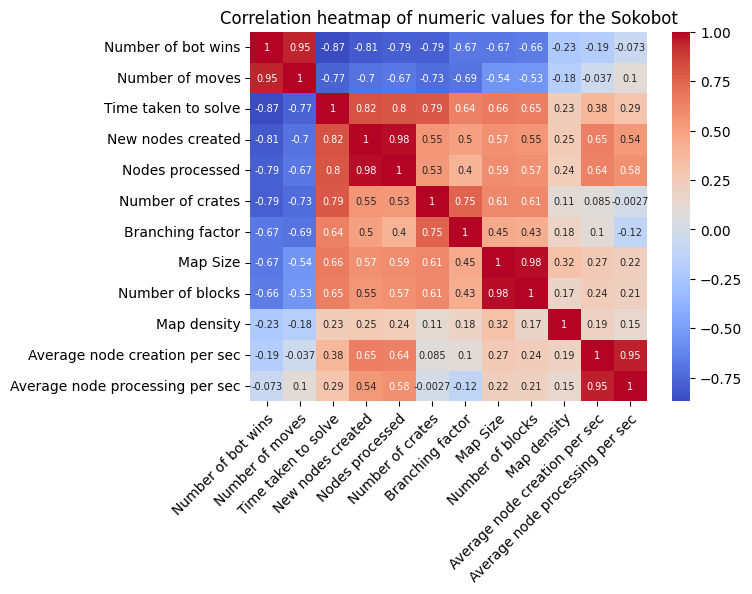

In [49]:
# Correlation map by Spearman
numeric_df = df[
    [
        "has_bot_win_numeric", 
        "no_of_move", 
        "time_taken", 
        "child_nodes_made", 
        "nodes_expanded", 
        "no_of_crates", 
        "branching_factor", 
        "map_size", 
        "number_of_blocks", 
        "map_density", 
        "avg_node_creation_per_sec",
        "avg_node_processed_per_sec"
     ]
]
numeric_df = numeric_df.rename(columns=INFO_NAMES)

corr_map_spearman = numeric_df.corr(method='spearman')

fig, ax = plt.subplots()
corr_heatmap = sns.heatmap(corr_map_spearman,
            annot=True,
            cmap=plt.get_cmap('coolwarm'),
            ax=ax,
            annot_kws={'size': 7}
            )
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title("Correlation heatmap of numeric values for the Sokobot")

print(corr_heatmap)

Based on correlation map, we can choose which type of information to inspect for each factor that is worth to analyze.

Here are some pairs of types of informaton to inspect:
- Success Rate (Number of bot wins):
  - Number of moves
  - Time taken to solve
  - New nodes created and nodes processed 
  - Crate Count
  - Branching factor
  - Map size
  - Number of Blocks
- Time Taken to solve:
  - Node Created
  - Node Processed
  - Crate Count
  - Branching factor
  - Map size
  - Number of Blocks
- Branching Factor:
  - Number of Crates
  - Map Size

## Success rate 
Success rate measures the likelihood for the sokobot to find a solution within 15.0 seconds in a given map.

Based on the correlation map we have induce the possible factors that have a *strong* correlation:
| Type                                  | Reasoning                                                                                                                                                                           |
|---------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Number of moves                       | It is a given since those with an actual solution have moves greater than zero. Thanks to data cleaning, we can gurantee that any timed out or impossible maps have a solution length of zero. Thus, it is intuitive to have direct relationship there.                                                       |
| Time taken to solve                   | The more time a bot needs to solve a problem, the less likely a map it is solvable given the time limit. An increase of difficulty of a map would naturally take longer to process. |
| New nodes created and nodes processed | The more information the bot needs to solve and process, the farther the goal is from the time limit.                                                                               |
| Crate Count                           | Increasing crate count increases difficulty to solve as you have more goals to keep track of to win.                                                                                |

There are also those with a *moderate* correlation that may be worth to check:
| Type                                  | Reasoning                                                                                                                                                                           |
|---------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Branching factor                      | Increasing the branching factor means that there are more states to explore. The more computationally harder it is to explore, the less likely a bot can find a solution within 15.0 seconds. |
| Map Size                              | Increasing the map size increases the amount of tiles needed to be account by the program.                                                    |
| Number of blocks                      | This may be an indicator that does not factor into a bots success as it increases with Map size in general.|

The figures below describes likelihood to succeed in all of the maps tested:

In [50]:
# Overall in most games
essay_overall_wins = [
    "How many tests have sokobot won in General?",
    "{}Won{}      : {}".format(colored_text(COLORS["GREEN"]),  RESET_COLORS, str(df_sucessful.shape[0])),
    "{}Fail{}     : {}".format(colored_text(COLORS["RED"]), RESET_COLORS, str(df_failed.shape[0])),
    "---------+--------------------------------",
    "Win Rate : {}% of out of {} tests".format(str(round(df_sucessful.shape[0] / df.shape[0] * 100, 2)), str(df.shape[0])),
    f"{str_percentage_bar(partial=df_sucessful.shape[0], total=df.shape[0])}\n"
]

print_essay(essay_overall_wins)



How many tests have sokobot won in General?
Won      : 1219
Fail     : 1531
---------+--------------------------------
Win Rate : 44.33% of out of 2750 tests
[█████████████-----------------]( 44.33 % )



### Number of Moves
> "It is a given since those with an actual solution have moves greater than zero. Thanks to data cleaning, we can gurantee that any timed out or impossible maps have a solution length of zero. Thus, it is intuitive to have direct relationship there."

The average number of moves that sokoban does it around 54 moves with an std of 84. However, this in accounting with failed maps, which has a solution length of 0. 

In [51]:
print_stats(df, "no_of_move")


Number of moves
Mean               : 54.09
Standard Deviation : 84.26
Min, Max           : (0.00, 1326.00)


Accounting for successful solvable maps that fit within the 15.0 second limit, the average number of moves in a solvable map is around 122, with a standard deviation of 88.

In [52]:
print_stats(df_sucessful, "no_of_move")


Number of moves
Mean               : 122.04
Standard Deviation : 87.89
Min, Max           : (1.00, 1326.00)


The order of magnitude for the number of moves in solvable maps seems to be from 2.0 to 2.5, so a majority of the moves will be between around 100 - 316 moves.

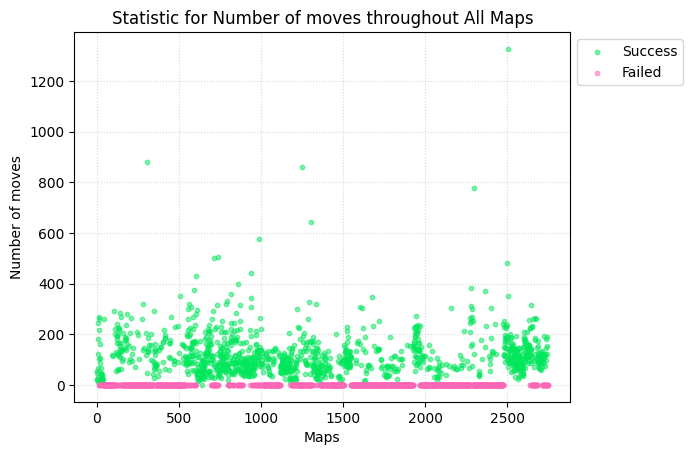

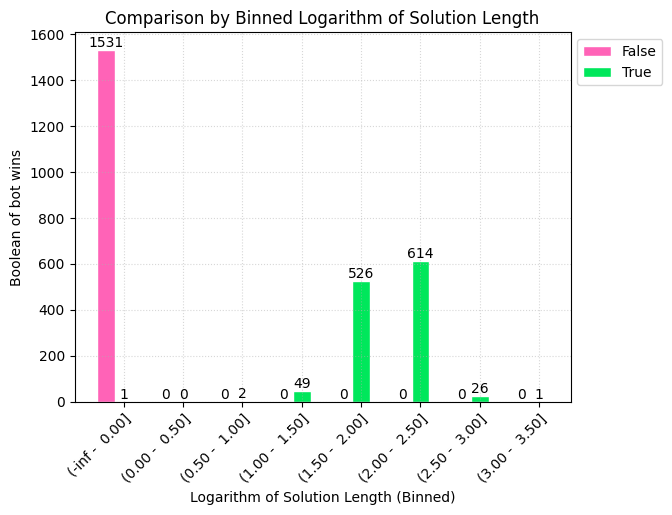

In [53]:
no_of_move_bins = [-math.inf, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
plot_bar_success_comparison("no_of_move") 
plot_bar_normal_bins(df, 
                info_type = "log_no_of_move", group_type = "has_bot_won", 
                bins = no_of_move_bins, 
                colors=[COLORS["RED"], COLORS["GREEN"]]
                )

### Time Taken to Solve
> "The more time a bot needs to solve a problem, the less likely a map it is solvable given the time limit. An increase of difficulty of a map would naturally take longer to process."

For any given map, whether it is solvable or not, takes around an average of 9.05 seconds with a standard deviation of 6.9. This is including maps that the sokoban bot was not able to solve.

In [54]:
print_stats(df, "time_taken")


Time taken to solve
Mean               : 9.06
Standard Deviation : 6.94
Min, Max           : (0.06, 15.25)


However, the average time for the sokobot to find a solution in a solvable map is around 1.6 with a standard deviation of 3.0. 

In [55]:
print_stats(df_sucessful, "time_taken")


Time taken to solve
Mean               : 1.67
Standard Deviation : 3.01
Min, Max           : (0.06, 15.00)


In [56]:
get_relationship_type(df_sucessful, ("time_taken", "has_bot_win_numeric"))


O notation Likelihood in the relationship for Time taken to solve and Number of bot wins
Exponential   (r2, rmse): 1.0, 0.0
Linear        (r2, rmse): 1.0, 0.0
Logarithmic   (r2, rmse): 1.0, 0.0


(0, np.float64(0.0))

The figure below shows that most maps where the sokobot failed is stuck at the 15.0 seconds time limit. The other few red dots represent when there is no solution to be found.

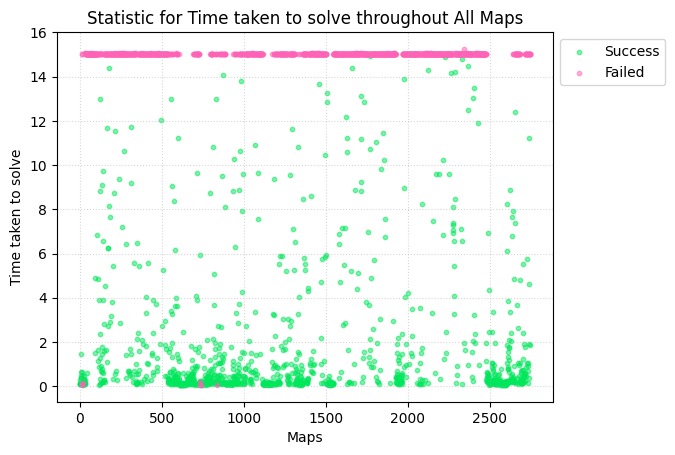

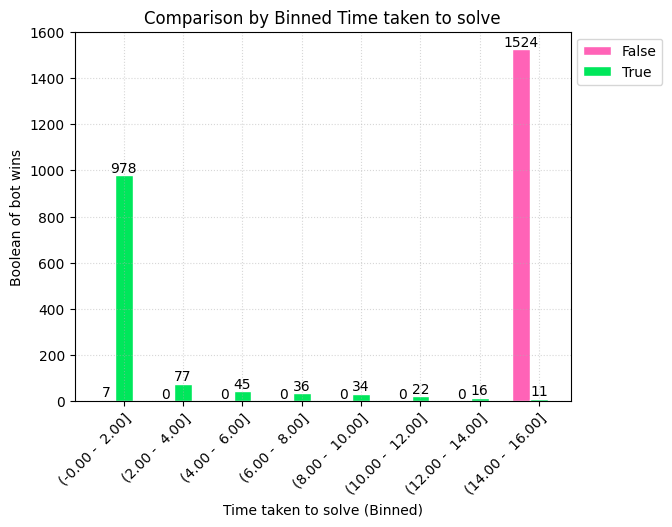

In [57]:
plot_bar_success_comparison("time_taken")
plot_bar_normal_bins(df, 
                info_type = "time_taken", group_type = "has_bot_won", 
                bins = [0, 2, 4, 6, 8, 10, 12, 14, 16], 
                colors=[COLORS["RED"], COLORS["GREEN"]]
                )

### New nodes created and processed
> "The more information the bot needs to solve and process, the farther the goal is from the time limit."

Failed maps are interesting to note for node creation and processing, for they are in certain range of values for nodes created and processed.


The logarithm of the child nodes created, or more intuitively its **the order of magnitude**, seems to be around 6 to 6.5. 
Looking back at the original dataset, the failed dataset have child nodes produced at range from 1.0 to 3.1 millions nodes. 


This is an indicator that some hard maps require more moves to process and to find the solution. Hard maps within a given time limit means only a limit range of nodes can ever be produced. it may give rise to place a boundary of amount of nodes to create and process within that 15.0 time limit.

In [58]:
print_stats(df, "child_nodes_made")
print_stats(df_sucessful, "child_nodes_made")


New nodes created
Mean               : 1060005.47
Standard Deviation : 833897.99
Min, Max           : (1.00, 2822984.00)

New nodes created
Mean               : 231375.22
Standard Deviation : 434399.90
Min, Max           : (2.00, 2363304.00)


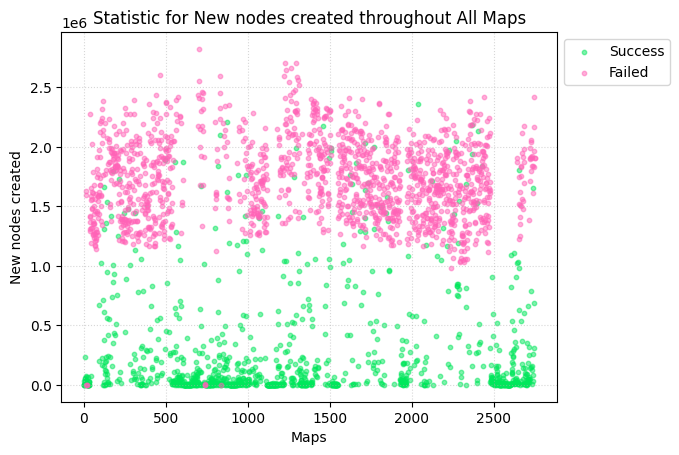

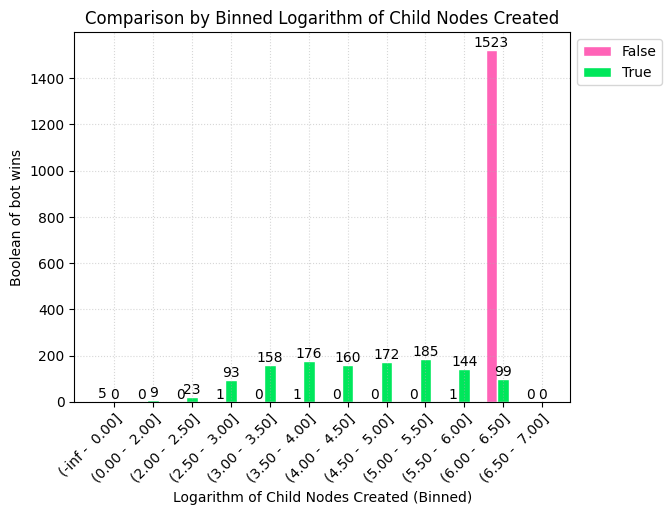

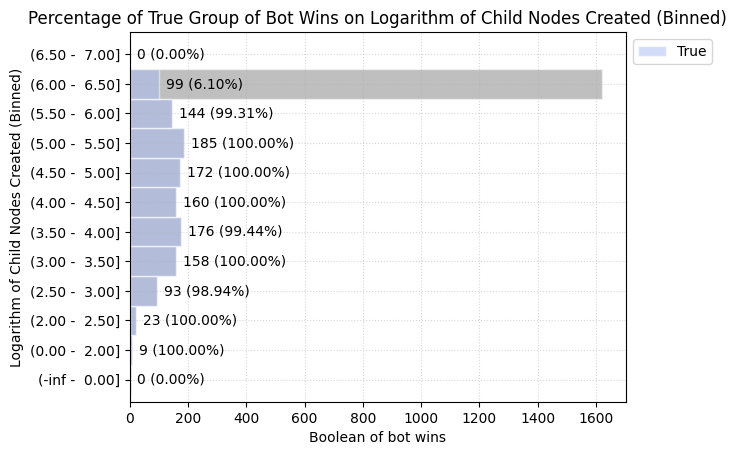

In [59]:
nodes_expanded_bins = [-math.inf, 0, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
plot_bar_success_comparison("child_nodes_made")
plot_bar_normal_bins(df, 
                info_type = "log_child_nodes_made", group_type = "has_bot_won", 
                bins = nodes_expanded_bins, 
                colors=[COLORS["RED"], COLORS["GREEN"]]
                )
plot_bar_percentage_bin(df = df, 
                     info_type = "log_child_nodes_made",
                     group_type = "has_bot_won", 
                     group_selected = True, 
                     bins = nodes_expanded_bins
                     )

The nodes proccessed by the sokobot for a given map ranges from 0.7 to 2.0 million. The order of magnitude is around 6 to 6.5.

In [60]:
print_stats(df, "nodes_expanded")
print_stats(df_sucessful, "nodes_expanded")


Nodes processed
Mean               : 704914.47
Standard Deviation : 568641.17
Min, Max           : (1.00, 2124784.00)

Nodes processed
Mean               : 173691.09
Standard Deviation : 322619.90
Min, Max           : (2.00, 1674763.00)


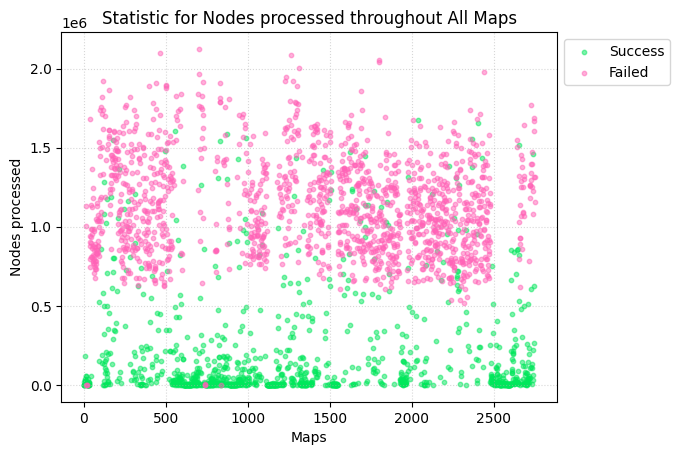

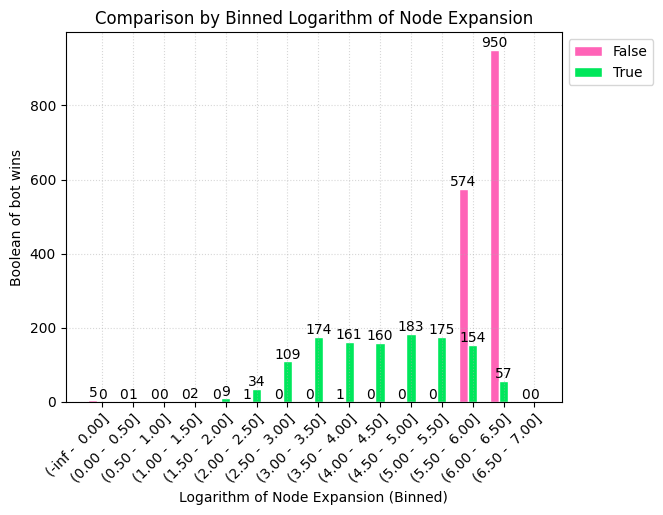

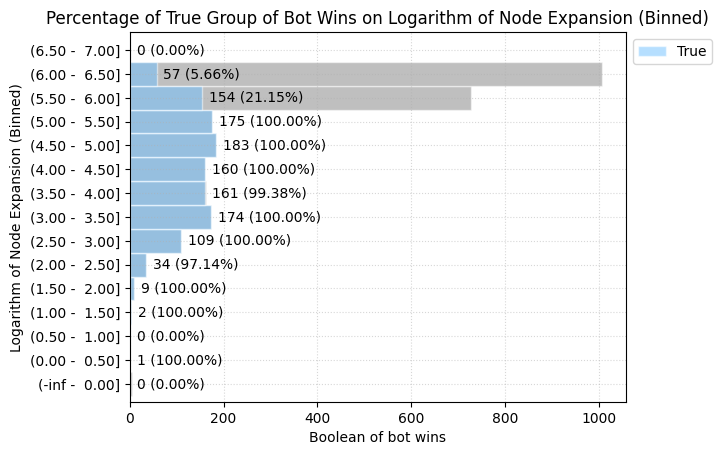

In [61]:
plot_bar_success_comparison("nodes_expanded")

nodes_expanded_bins = [-math.inf, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
plot_bar_normal_bins(df, 
                info_type = "log_nodes_expanded", group_type = "has_bot_won", 
                bins = nodes_expanded_bins, 
                colors=[COLORS["RED"], COLORS["GREEN"]]
                )
plot_bar_percentage_bin(df = df, 
                     info_type = "log_nodes_expanded",
                     group_type = "has_bot_won", 
                     group_selected = True, 
                     bins = nodes_expanded_bins
                     )

### Crate Count

> "Increasing crate count increases difficulty to solve as you have more goals to keep track of to win."

The figure below displays the percentage of maps completed as the number of crates increases. The number of maps complete sharply decreases as the number of boxes increases.

In [62]:
print("\nAll maps:")
print_stats(df, "no_of_crates")


All maps:

Number of crates
Mean               : 7.88
Standard Deviation : 4.00
Min, Max           : (1.00, 16.00)


In [63]:

# Map size
print("\nSuccesful solvable maps:")
print_stats(df_sucessful, "no_of_crates")

print("\nFailed maps:")
print_stats(df_failed, "no_of_crates")


Succesful solvable maps:

Number of crates
Mean               : 4.51
Standard Deviation : 1.81
Min, Max           : (1.00, 12.00)

Failed maps:

Number of crates
Mean               : 10.56
Standard Deviation : 3.14
Min, Max           : (1.00, 16.00)


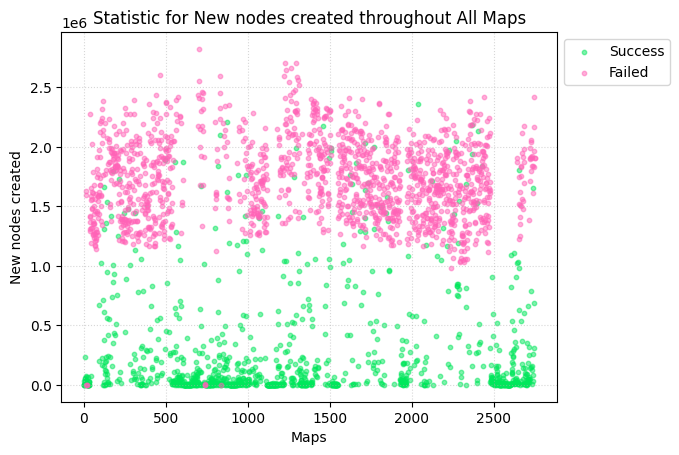

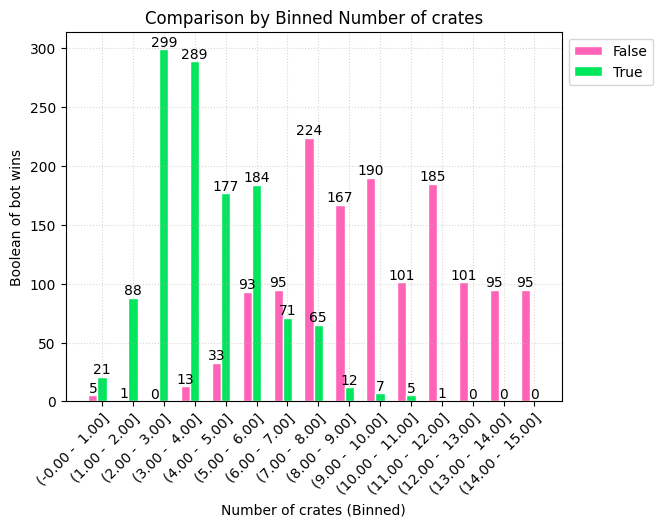

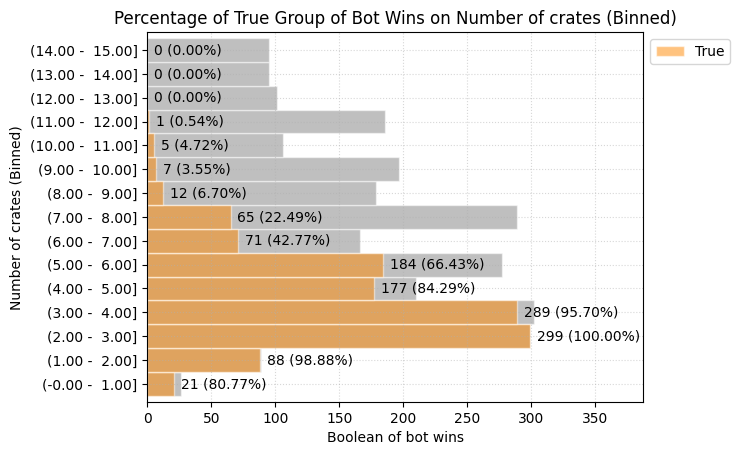

In [64]:

plot_bar_success_comparison("child_nodes_made")
plot_bar_normal_bins(df, 
                 "no_of_crates", "has_bot_won",
                 bins=np.arange(16),
                 colors=[COLORS["RED"], COLORS["GREEN"]]
                 )

plot_bar_percentage_bin(df = df, 
                     info_type = "no_of_crates",
                     group_type = "has_bot_won", 
                     group_selected = True, 
                     bins = np.arange(16)
                     )


### Branching factor
> "Increasing the branching factor means that there are more states to explore. The more computationally harder it is to explore, the less likely a bot can find a solution within 15.0 seconds."

It is worth to note that the number of children nodes produces is four for both invalid and valid nodes, with one processed per iteration.

The branching factor for any given map has a mean of 1.44 with an std of 0.22.

In [65]:
print_stats(df_sucessful, "branching_factor")


Branching factor
Mean               : 1.29
Standard Deviation : 0.14
Min, Max           : (1.00, 2.12)


In [66]:
print_stats(df, "branching_factor")


Branching factor
Mean               : 1.44
Standard Deviation : 0.22
Min, Max           : (1.00, 2.27)


In [67]:
print_stats(df_failed, "branching_factor")


Branching factor
Mean               : 1.56
Standard Deviation : 0.19
Min, Max           : (1.00, 2.27)


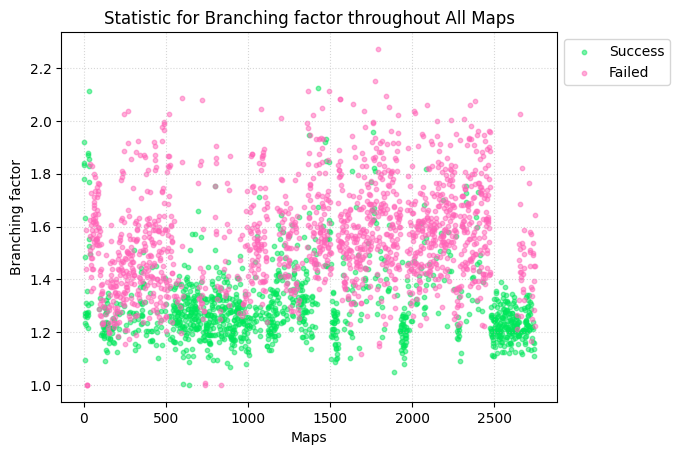

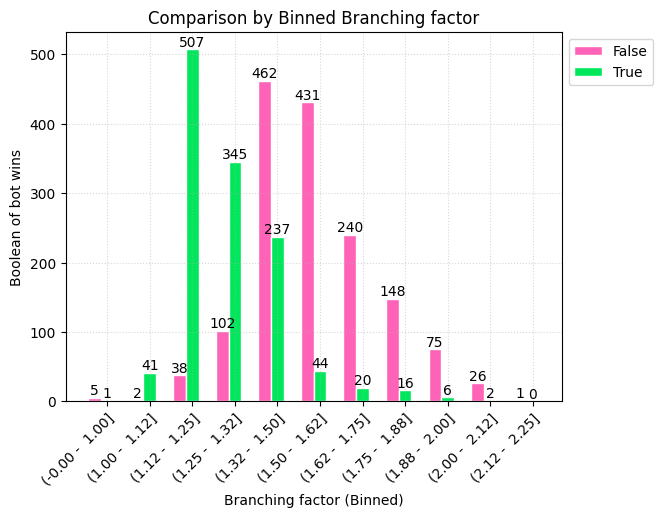

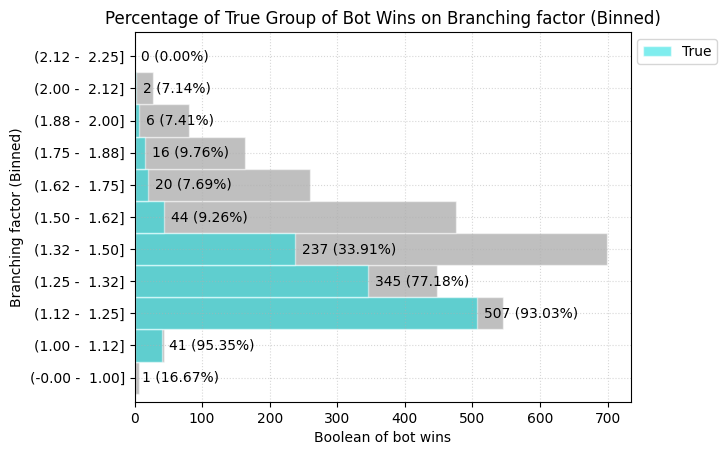

In [68]:
plot_bar_success_comparison("branching_factor")
plot_bar_normal_bins(df, 
                info_type = "branching_factor", group_type = "has_bot_won",   
                bins = [0, 1, 1.125, 1.25, 1.325, 1.5, 1.625, 1.75, 1.875, 2, 2.125, 2.25],
                colors=[COLORS["RED"], COLORS["GREEN"]]
                )
plot_bar_percentage_bin(df = df, 
                     info_type = "branching_factor",
                     group_type = "has_bot_won", 
                     group_selected = True, 
                     bins = [0, 1, 1.125, 1.25, 1.325, 1.5, 1.625, 1.75, 1.875, 2, 2.125, 2.25]
                     )

### Map size
> "Increasing the map size increases the amount of tiles needed to be account by the program. Although, it is moderate correlation."

Taking the logarithm of the map size has produced these interesting gaussian distributions. 

Most solvable maps are a size of 10^4.37 or 23,442 tiles squared, while most unsolvable ones are around 1e6 tiles squared.

In [69]:

# Map size
print("\nSolvable maps:")
df["log_map_size"] = df["map_size"].agg(math.log)
print_stats(df, "log_map_size")

print("\nSuccesful solvable maps:")
df_sucessful["log_map_size"] = df_sucessful["map_size"].agg(math.log)
print_stats(df_sucessful, "log_map_size")

print("\nFailed maps:")
df_failed["log_map_size"] = df_failed["map_size"].agg(math.log)
print_stats(df_failed, "log_map_size")


Solvable maps:

Logarithm of Map Size
Mean               : 4.72
Standard Deviation : 0.51
Min, Max           : (2.71, 7.59)

Succesful solvable maps:

Logarithm of Map Size
Mean               : 4.37
Standard Deviation : 0.37
Min, Max           : (2.71, 6.72)

Failed maps:

Logarithm of Map Size
Mean               : 5.00
Standard Deviation : 0.44
Min, Max           : (3.74, 7.59)


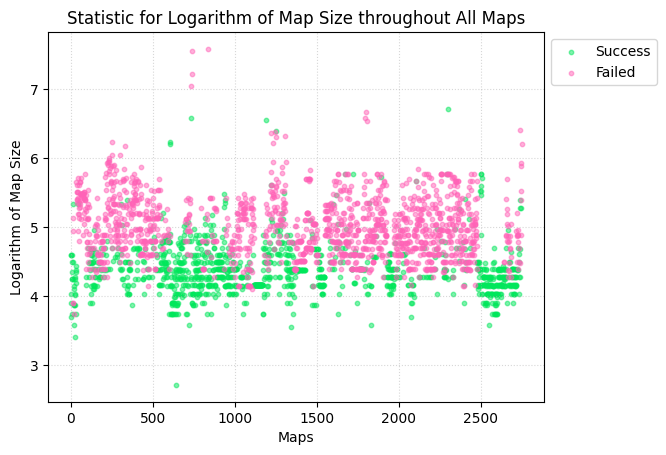

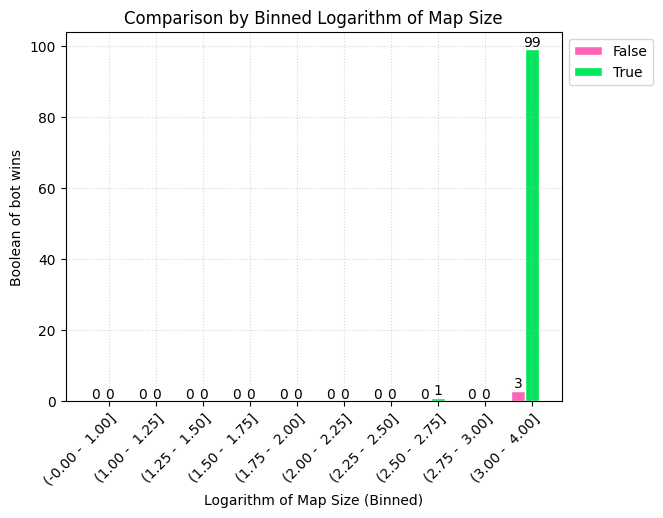

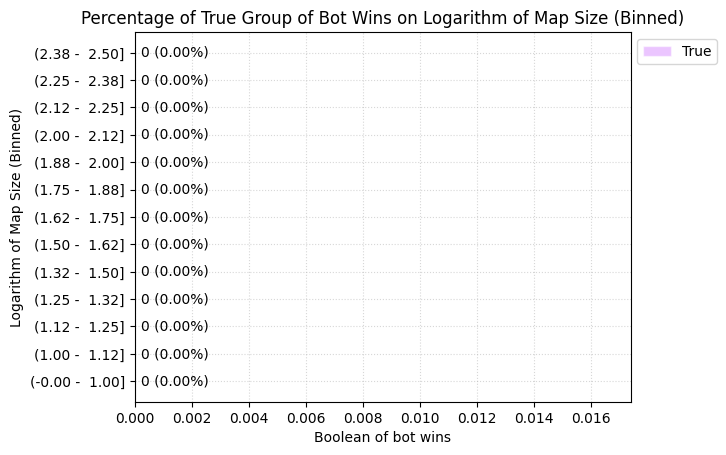

In [70]:
map_size_bins = [0, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 4]
plot_bar_success_comparison("log_map_size")
plot_bar_normal_bins(df, 
                info_type = "log_map_size", group_type = "has_bot_won",   
                bins = map_size_bins, 
                colors=[COLORS["RED"], COLORS["GREEN"]]
                )
plot_bar_percentage_bin(df,
                        info_type = "log_map_size",
                        group_type = "has_bot_won", 
                        group_selected = True, 
                        bins = [0, 1, 1.125, 1.25, 1.325, 1.5, 1.625, 1.75, 1.875, 2, 2.125, 2.25, 2.375, 2.50]
                        )


If the map is solvable within 15.0 seconds, the mean is 1.29. This means difficult maps tends to produce more valid states for the program to explore than the rate it can explore each one.

## Time taken to solve
This is the amounnt of time needed to solve a given problem within the 15.0 second time limit. 

Here are some factors to explore:

| Type             | Reasoning                                                                                                                         |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Node Created     | This is an indicator that whatever map the sokoban solver is trying to solve has a wide state space.                              |
| Node Processed   | Another indicator along side node creation.                                                 |
| Crate Count      | An increase in crates means there's more goal states to keep track, this increases computation time and thus time taken to solve. |
| Branching factor | This is an indicator of the difficulty of the map. A higher branching factor means more computation time to solve.                |
| Map size         | An increase in map size means there may be more possible states to keep track of.                                                 |
| Number of Blocks | This is an indicator since it includes crates, goal tiles, and unpassable walls.                                                  |

### Nodes Created and Processed
> "This is an indicator that whatever map the sokoban solver is trying to solve has a wide state space. Node processed is another indicator along side node creation."

As time increases, the amount of states produced and processed increases also. By using linear regression, we can verify that both are in a linear relationship.

[142181.11929577]

O notation Likelihood in the relationship for Time taken to solve and New nodes created
Exponential   (r2, rmse): 0.415277131593743, 1.8997376722239567
Linear        (r2, rmse): 0.9864438703026616, 41902.57308817826
Logarithmic   (r2, rmse): 0, 0


(1, np.float64(41902.57308817826))

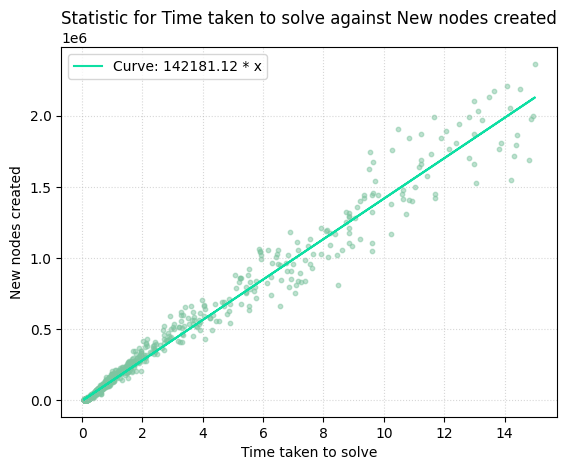

In [71]:
plot_scat_tuple(df_sucessful, ("time_taken", "child_nodes_made"))
get_relationship_type(df_sucessful, ("time_taken", "child_nodes_made"))

[104570.96708751]

O notation Likelihood in the relationship for Time taken to solve and Nodes processed
Exponential   (r2, rmse): 0.4196290677490232, 1.8711048629894318
Linear        (r2, rmse): 0.9818120553561996, 37265.63670688951
Logarithmic   (r2, rmse): 0, 0


(1, np.float64(37265.63670688951))

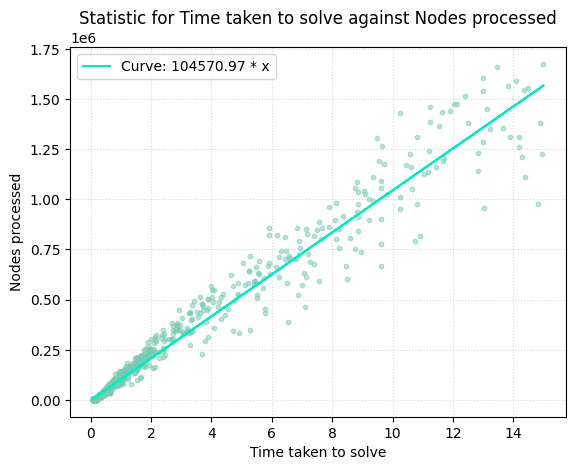

In [72]:
plot_scat_tuple(df_sucessful, ("time_taken", "nodes_expanded"))
get_relationship_type(df_sucessful, ("time_taken", "nodes_expanded"))

### Crate count
> "An increase in crates means there's more goal states to keep track, this increases computation time and thus time taken to solve."

As crate count increases, the average time to complete the map increases. Near the end, it plateaus near 15.0 seconds. 

Time taken to solve for each increase in the number of crates:

O notation Likelihood in the relationship for Number of crates and Time taken to solve
Exponential   (r2, rmse): 0.5106553678813445, 0.9649800759471752
Linear        (r2, rmse): 0.17334848750464726, 2.1484334363306714
Logarithmic   (r2, rmse): -1.9730302174962753, 47448.10470512729


(2, np.float64(0.9649800759471752))

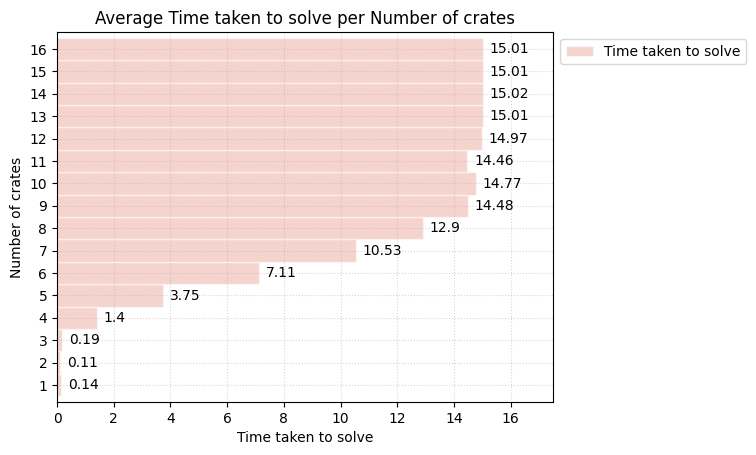

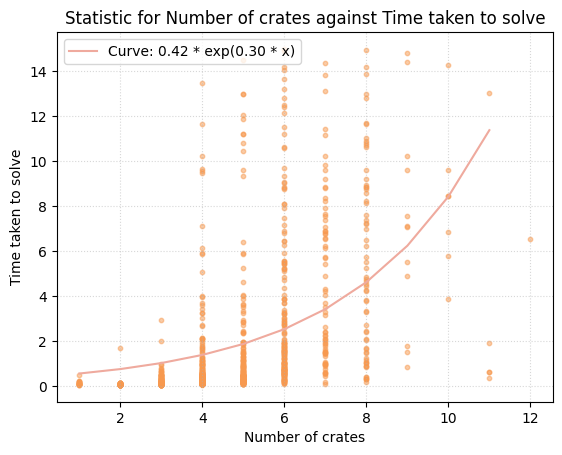

In [73]:
print("Time taken to solve for each increase in the number of crates:")
plot_bar_groupby(df, "no_of_crates", "time_taken")
plot_scat_tuple(df_sucessful, ("no_of_crates", "time_taken"))
get_relationship_type(df_sucessful,  ("no_of_crates", "time_taken"))

### Map Size
> "This is an indicator of the difficulty of the map. A higher branching factor means more computation time to solve."

What is interesting is that the map size correlates with the time taken with a interesting relationship. 
When plotted, the graph seems to be a linear relationship. 

By passing multiple models of linear regression, such as transforming the range by passing in a natural log, the nature of the relationship maybe exponential with very small coefficients.

A normal linear regression is very similar though.


O notation Likelihood in the relationship for Time taken to solve and Map Size
Exponential   (r2, rmse): 0.27519752949436804, 0.43612937364812704
Linear        (r2, rmse): 0.04941436214593087, 106.18797722098664
Logarithmic   (r2, rmse): 0, 0


(2, np.float64(0.43612937364812704))

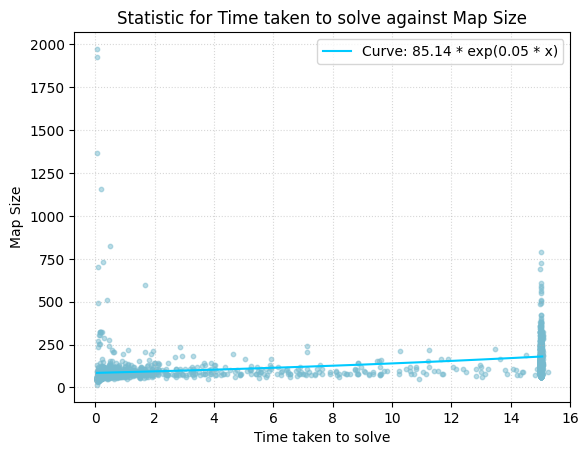

In [74]:
plot_scat_tuple(df, ("time_taken", "map_size"))
get_relationship_type(df,  ("time_taken", "map_size"))

## Branching Factor
The branching factor is the amount valid children nodes produced as the sokoban solver produces.

The higher the branching factor is, the more computationally expensive it is. 

$$
B=\frac{\text{Node children created}}{\text{Nodes processed}}
$$

The formula of the branching factor above shows that it is a ratio of nodes created over the nodes processed.

Some factors to explore:

|Type             | Reasoning                                                                            |
|-----------------|--------------------------------------------------------------------------------------|
|Number of Crates | Increasing the number of crates increases the requirements to find the goal.         |
|Map Size         | Increasing the map size may possibly increase the amount of valid states to explore. |

In [75]:
essay_overall_branch_factor = [
    "What is the estimated weighted average for the branching factor for sokobot?",
    "Overall Branching factor: {}".format(round(df["branching_factor"].agg("mean"), 2))
]
print_essay(essay_overall_branch_factor)
display(Math(r'B_{o} = {%f}' % (df["branching_factor"].agg("mean"))))

essay_winning_factor = [
    f"For tests that are {colored_text(COLORS["GREEN"])}solvable in 15.0 seconds{RESET_COLORS}, what is the branching factor?",
    "Wins Branching factor: {}".format(round(df_sucessful["branching_factor"].agg("mean"), 2))
]
print_essay(essay_winning_factor)
display(Math(r'B_{w} = {%f}' % (df_sucessful["branching_factor"].agg("mean"))))


essay_failing_factor_factor = [
    f"For tests that {colored_text(COLORS["RED"])}failed{RESET_COLORS}, what is the branching factor?",
    "Fail Branching factor: {}".format(round(df_failed["branching_factor"].agg("mean"), 2))
]
print_essay(essay_failing_factor_factor)
display(Math(r'B_{l} = {%f}' % (df_failed["branching_factor"].agg("mean"))))



What is the estimated weighted average for the branching factor for sokobot?
Overall Branching factor: 1.44


<IPython.core.display.Math object>


For tests that are solvable in 15.0 seconds, what is the branching factor?
Wins Branching factor: 1.29


<IPython.core.display.Math object>


For tests that failed, what is the branching factor?
Fail Branching factor: 1.56


<IPython.core.display.Math object>

How does time to solve correlate with the number of crates?

### Number of Crates
> "Increasing the number of crates increases the requirements to find the goal. "

Based on exploring linear regression scores, it may be exponential and linear in nature. 


O notation Likelihood in the relationship for Number of crates and Branching factor
Exponential   (r2, rmse): 0.12840344352475708, 0.09377821760111434
Linear        (r2, rmse): 0.12762641693957566, 0.13155513524590956
Logarithmic   (r2, rmse): 0.12158142992477827, 0.5692050120280475


(2, np.float64(0.09377821760111434))

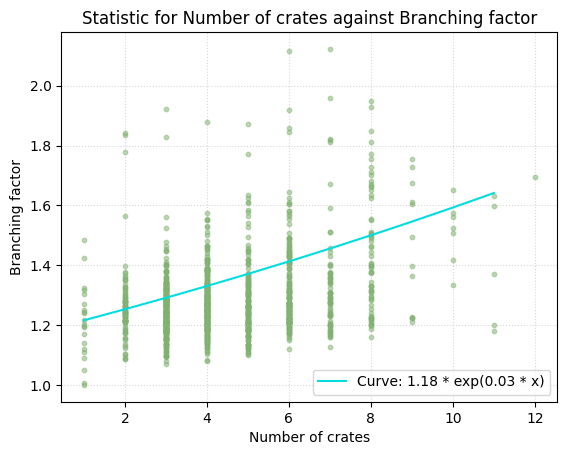

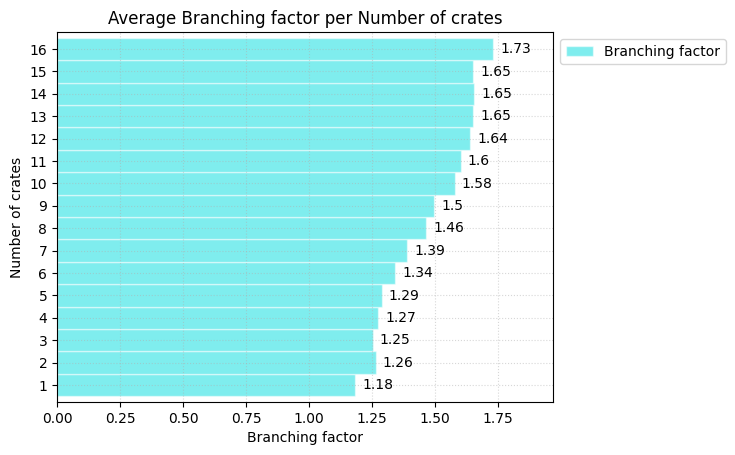

In [76]:
plot_scat_tuple(df_sucessful, ("no_of_crates", "branching_factor"))
plot_bar_groupby(df, "no_of_crates", "branching_factor")
get_relationship_type(df_sucessful, ("no_of_crates", "branching_factor"))

### Map Size
> "Increasing the map size may possibly increase the amount of valid states to explore."

Interestingly, the linear regression scores indicate that no amount of relationship. 

[-8.29576803]

O notation Likelihood in the relationship for Branching factor and Map Size
Exponential   (r2, rmse): -0.03942294325699769, 0.29567537640684316
Linear        (r2, rmse): -0.14869646607435572, 25.00113457527222
Logarithmic   (r2, rmse): 0, 0


(0, 0)

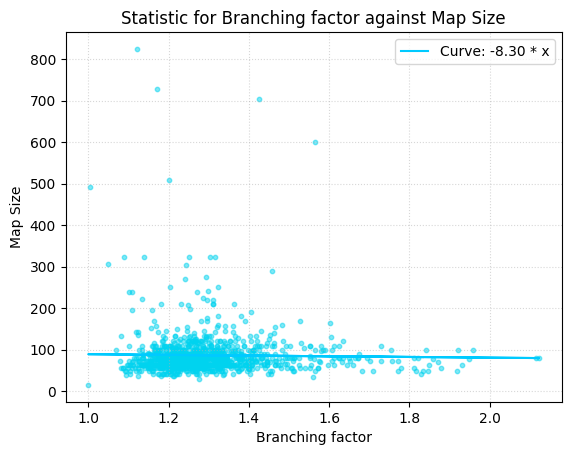

In [77]:
plot_scat_tuple(df_sucessful, ("branching_factor", "map_size"))
get_relationship_type(df_sucessful, ("branching_factor", "map_size"))

## Other Observations

The time taken, number of creates, states produced and processed for solutions correlate strongly with each other.

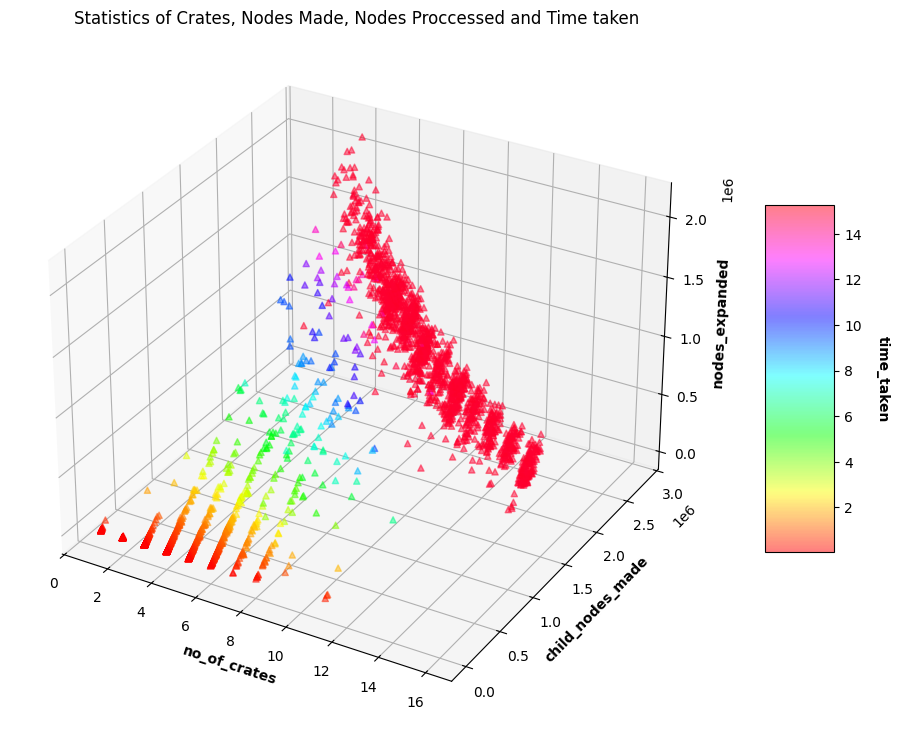

In [78]:
plot_scat_3d_cmap(df, ("no_of_crates", "child_nodes_made", "nodes_expanded"), "time_taken", is_create_video=True, is_gif=True)

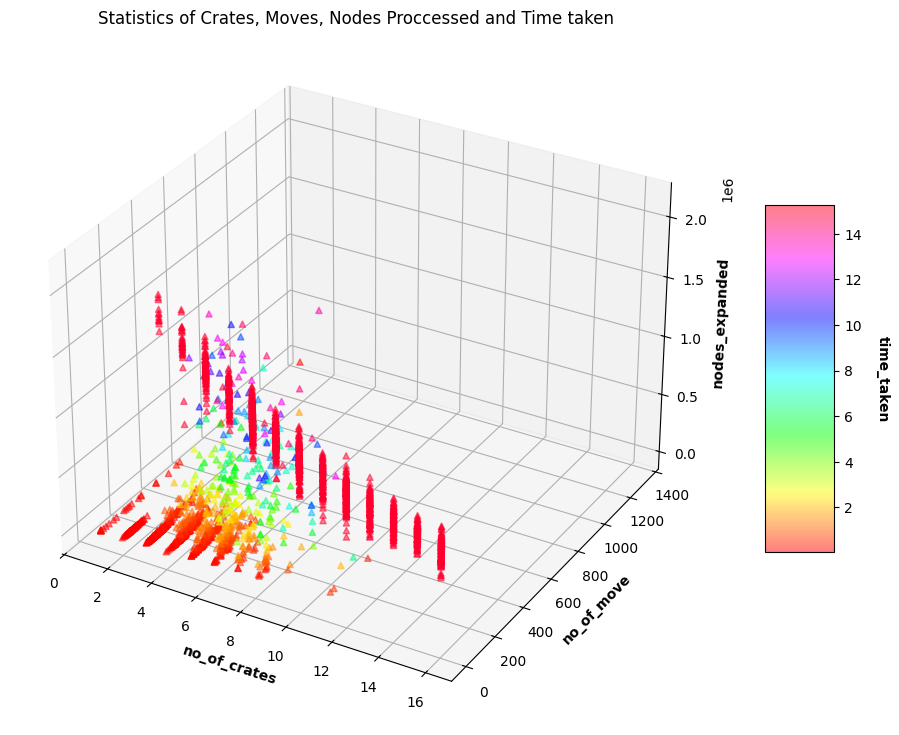

In [79]:
plot_scat_3d_cmap(df, ("no_of_crates", "no_of_move", "nodes_expanded"), "time_taken")